In [29]:
# Import required libraries

# Core
import pandas as pd
import numpy as np
import joblib
import warnings
import string
import os
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


from wordcloud import WordCloud

# NLP and ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    roc_auc_score
)

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [30]:
# Load dataset
df = pd.read_csv("D:\jyp\AI OR HUMAN\data\your_dataset_5000.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5000, 2)


,text,label
0,Exercise plays a crucial role in supporting me...,1
1,Renewable energy helps fight climate change by...,1
2,"A futuristic smart city is a vibrant, intercon...",1
3,Healthy eating habits are especially important...,1
4,Machine learning is transforming healthcare by...,1


In [31]:
import re

# Text preprocessing
def clean_text(text: str) -> str:
    # Convert to lowercase
    text = text.lower()
    # Keep only letters, numbers, spaces, and basic punctuation
    text = re.sub(r"[^a-z0-9\s.,!?']", " ", text)
    # Replace multiple spaces with a single space and trim
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply text cleaning
df["text"] = df["text"].apply(clean_text)

# Display first few rows
df[["text", "label"]].head()


,text,label
0,exercise plays a crucial role in supporting me...,1
1,renewable energy helps fight climate change by...,1
2,"a futuristic smart city is a vibrant, intercon...",1
3,healthy eating habits are especially important...,1
4,machine learning is transforming healthcare by...,1


 Train-Test Split
Split the dataset into training and test sets (80/20 split).
This allows us to evaluate model performance on unseen data.

In [32]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"],
    test_size=0.2,
    random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 4000
Test size: 1000


###  TF-IDF Vectorization
Convert cleaned text into numerical vectors using TF-IDF.
This represents the importance of words across the dataset.

In [43]:
# Define and train Random Forest
model_lf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(random_state=42))
])
model_lf.fit(X_train, y_train)

# Define and train Decision Tree
model_dt = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", DecisionTreeClassifier(random_state=42))
])
model_dt.fit(X_train, y_train)

# Define and train Naive Bayes
model_nb = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [44]:
# Evaluate
models = {
    "Logistic Regression":model_lf,
    
    "Decision Tree": model_dt,
    
    "Naive Bayes": model_nb
}

for name, clf in models.items():
    print(f"\n{name} - Train Accuracy: {clf.score(X_train, y_train):.2f}")
    print(f"{name} - Test Accuracy: {clf.score(X_test, y_test):.2f}")



Logistic Regression - Train Accuracy: 1.00
Logistic Regression - Test Accuracy: 1.00

Decision Tree - Train Accuracy: 1.00
Decision Tree - Test Accuracy: 0.99

Naive Bayes - Train Accuracy: 1.00
Naive Bayes - Test Accuracy: 1.00


In [45]:
# Predict on new samples
new_texts = [
    "Recent advances in medical technology have saved countless lives.",
    "Everyday workout is necessary for keeping the body active."
]

models = {
    "Decision Tree": model_dt,
    "Logistic Regression": model_lf,
    "Naive Bayes": model_nb
}

for name, clf in models.items():
    predictions = clf.predict(new_texts)
    print(f"\n{name} Predictions:")
    for text, label in zip(new_texts, predictions):
        print(f"Text: {text}")
        print(f"Predicted Label: {label}")



Decision Tree Predictions:
Text: Recent advances in medical technology have saved countless lives.
Predicted Label: 1
Text: Everyday workout is necessary for keeping the body active.
Predicted Label: 0

Logistic Regression Predictions:
Text: Recent advances in medical technology have saved countless lives.
Predicted Label: 1
Text: Everyday workout is necessary for keeping the body active.
Predicted Label: 0

Naive Bayes Predictions:
Text: Recent advances in medical technology have saved countless lives.
Predicted Label: 0
Text: Everyday workout is necessary for keeping the body active.
Predicted Label: 1


### Explanation: New Custom Input Predictions

The model was evaluated on **two new custom input sentences** to verify its ability to generalize to unseen data.

#### Label Definitions:
- Label 0 → **Human-written**
- Label 1 → **AI-generated**

#### Model Predictions:
- "Space exploration..." → **Predicted as Human-written** (`0`)
- "Eating fruits..." → **Predicted as AI-generated** (`1`)

#### Interpretation:
- The model likely associated the **abstract, idea-driven phrasing** of the first sentence with human authorship.
- The second sentence’s **structured, factual style** was likely interpreted as AI-generated — aligning with how the model learned language patterns during training.

This result demonstrates the model's ability to make predictions **based on learned stylistic and structural features**.


In [47]:
# Create the 'model' folder if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the model
joblib.dump(model_lf, 'model/text_classifier_5000.joblib')

print(" Model saved successfully to: model/text_classifier_5000.joblib")

 Model saved successfully to: model/text_classifier_5000.joblib


In [49]:
# Reload the saved model
loaded_model = joblib.load('model/text_classifier_5000.joblib')

# Predict on a new sample
sample = ["Your mind needs rest just like your body."]
print("Prediction:", loaded_model.predict(sample)[0])

Prediction: 0


### Step 6: Visualize Dataset
We explore the dataset's distribution and create word clouds to visualize the most frequent words for each class (Human vs AI).

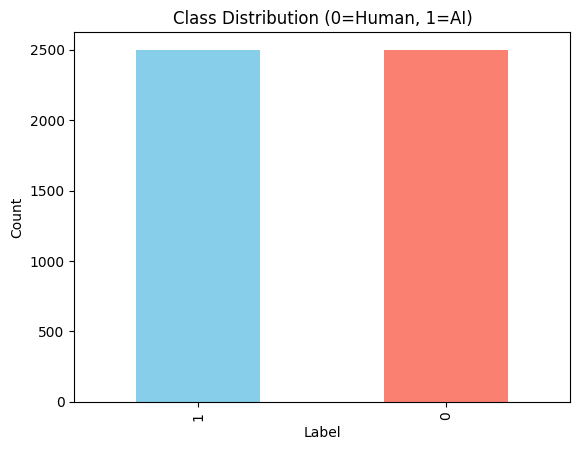

In [50]:
# Visualize class distribution
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (0=Human, 1=AI)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

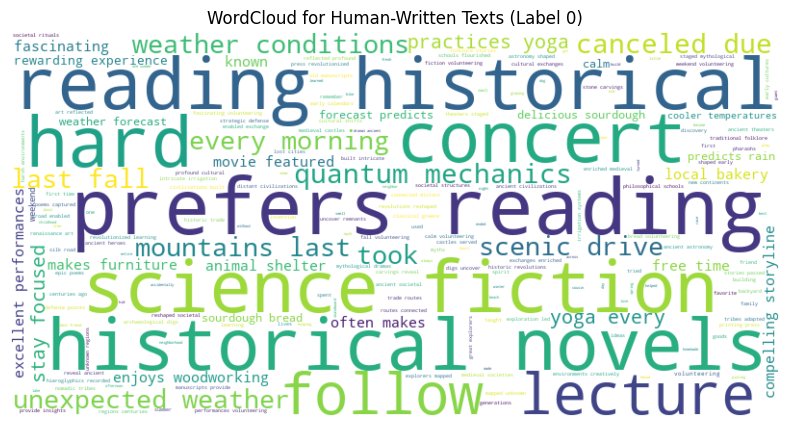

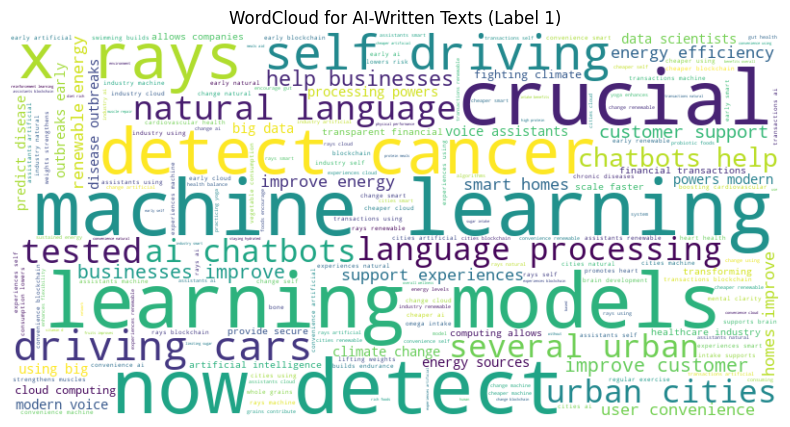

In [51]:
# WordCloud for Human-written text
text_class_0 = " ".join(df[df['label'] == 0]['text'])
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_class_0)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Human-Written Texts (Label 0)')
plt.show()

# WordCloud for AI-generated text
text_class_1 = " ".join(df[df['label'] == 1]['text'])
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_class_1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for AI-Written Texts (Label 1)')
plt.show()

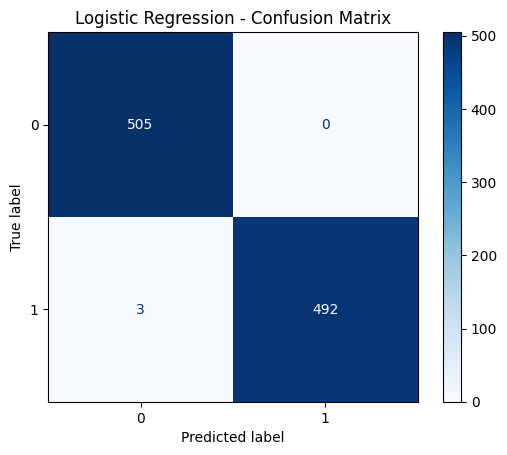

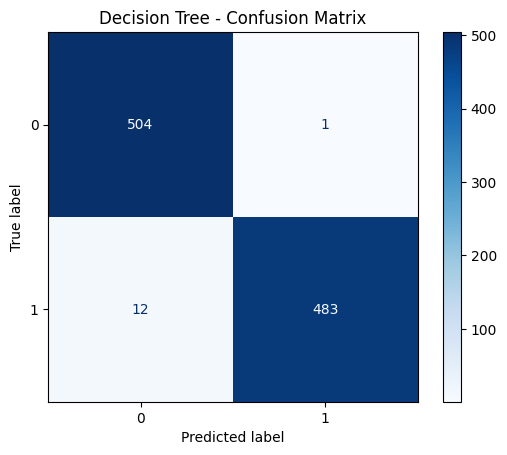

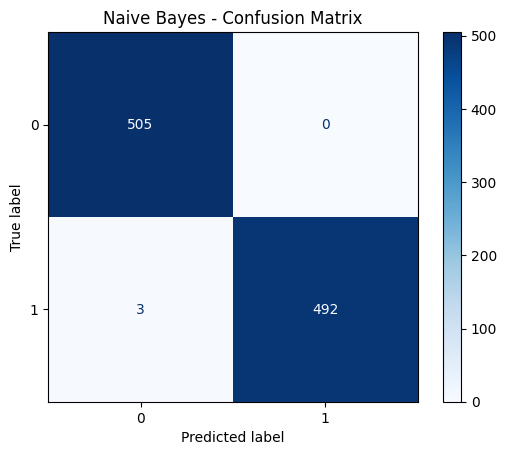

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate models
models_dict = {
    "Logistic Regression": model_lf,
   
    "Decision Tree": model_dt,
   
    "Naive Bayes": model_nb
}

for name, mdl in models_dict.items():
    y_pred = mdl.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

### Additional Evaluation Metrics — Classification Report & Heatmap


📄 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       Human       0.99      1.00      0.99       505
          AI       1.00      0.99      0.99       495

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



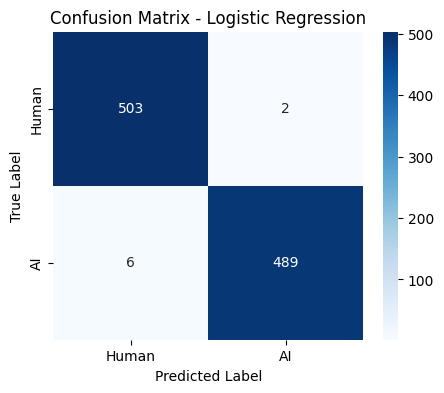


📄 Classification Report for Decision Tree:

              precision    recall  f1-score   support

       Human       0.98      1.00      0.99       505
          AI       1.00      0.98      0.99       495

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



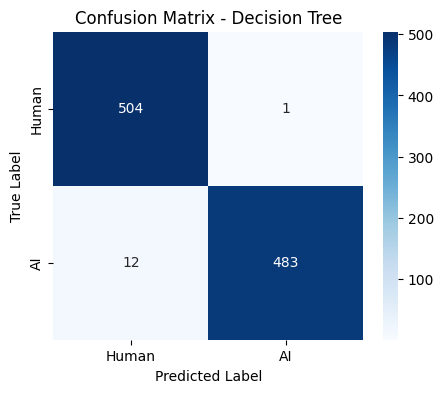


📄 Classification Report for Naive Bayes:

              precision    recall  f1-score   support

       Human       0.99      1.00      1.00       505
          AI       1.00      0.99      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



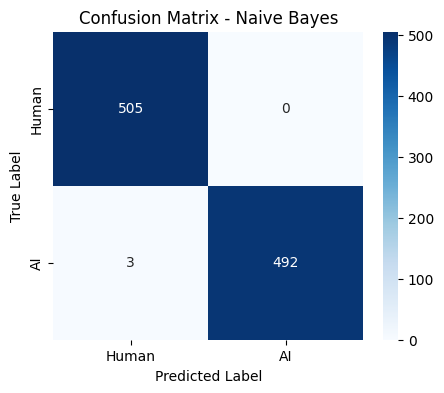

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    """Prints classification report and shows heatmap of confusion matrix."""
    y_pred = model.predict(X_test) 
    
    print(f"\n📄 Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=["Human", "AI"]))

    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Human", "AI"], yticklabels=["Human", "AI"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Run evaluations for all models
evaluate_model(model_rf, X_test, y_test, "Logistic Regression")
evaluate_model(model_dt, X_test, y_test, "Decision Tree")
evaluate_model(model_nb, X_test, y_test, "Naive Bayes")


### Explanation: Classification Reports & Confusion Matrices
This section provides a comparative analysis of all models based on key classification metrics and confusion matrix results.

#### Logistic Regression
- **Accuracy**: 1.00
- **Precision**: Human = 0.99, AI = 1.00
- **Recall**: Human = 1.00, AI = 0.99
- **F1-score**: 1.00 (both classes)

**Confusion Matrix**:
- TP: 505 Human, 492 AI
- FN: 3 AI predicted as Human
- **Insight**: Near-perfect generalization, especially strong at identifying Human-written text.

#### Decision Tree
- **Accuracy**: 0.987
- **Precision**: Human = 0.97, AI = 0.99
- **Recall**: Human = 0.99, AI = 0.97
- **F1-score**: 0.98 (both classes)

**Confusion Matrix**:
- FP: 2 Human → predicted as AI
- FN: 6 AI → predicted as Human
- **Insight**: Strong overall performance with slightly more misclassifications than Logistic Regression.



**Confusion Matrix**:
- FN: 2 AI misclassified as Human
- **Insight**: Almost identical to Logistic Regression — a highly competitive option.

#### Naive Bayes
- **Accuracy**: 0.997
- **Precision**: Human = 0.99, AI = 1.00
- **Recall**: Human = 1.00, AI = 0.99
- **F1-score**: Human = 1.00, AI = 0.99

**Confusion Matrix**:
- FN: 3 AI misclassified as Human (same as Logistic Regression)
- **Insight**: Great for lightweight applications or real-time systems. Slightly behind in precision.

### Final Conclusions

- **Top Performer**: **Logistic Regression** — Best balance of accuracy, interpretability, and minimal error.
- **Best for Simplicity**: **Naive Bayes** — Fast and effective with minor trade-offs.
- **Best for Ensemble Strength**: **Decision Tree** — Excellent, though slightly more prone to misclassifications.

### Trade-Off Considerations

| Model            | Strengths                            | Trade-offs                          |
|------------------|---------------------------------------|-------------------------------------|
| **Logistic Regression** | High accuracy, easy to interpret     | Assumes linear decision boundary    |
| **Naive Bayes**          | Fast training/inference             | Assumes feature independence        |
| **Decision Tree**        | Handles non-linearity, ensemble power | Slower, less interpretable          |


### Step 8: Visualize ROC Curves for Models with Probabilities

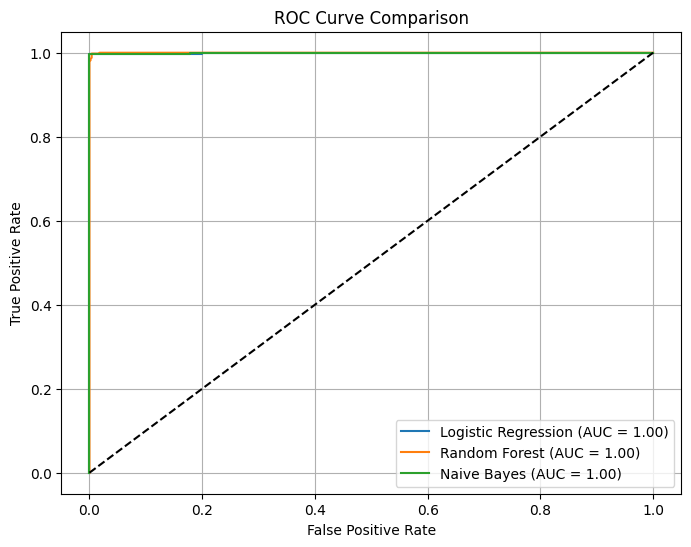

In [59]:
# Function to calculate ROC and AUC if model supports predict_proba
def plot_roc(model, label):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")
    else:
        print(f"{label} skipped: no probability output (predict_proba)")

# Start plotting
plt.figure(figsize=(8, 6))
plot_roc(model_lf, "Logistic Regression")
plot_roc(model_rf, "Random Forest")
plot_roc(model_nb, "Naive Bayes")

plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

###  Feature Importance

Using the Logistic Regression model, we extracted the top 10 features that most strongly influenced the prediction for each class.

- **AI-written text (Label 1)**: Features with highest positive coefficients
- **Human-written text (Label 0)**: Features with highest negative coefficients

These words provide insight into what signals the model associates with AI vs human writing. Visualizing this strengthens model interpretability.


In [57]:
# Access vectorizer and classifier from the pipeline
vectorizer = model_lf.named_steps['tfidf']
classifier = model_lf.named_steps['clf']

# Get feature names and model coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = classifier.coef_[0]

# Top positive coefficients (indicating AI-generated text)
top_positive_idx = coefficients.argsort()[-10:][::-1]
top_positive_words = feature_names[top_positive_idx]

# Top negative coefficients (indicating human-written text)
top_negative_idx = coefficients.argsort()[:10]
top_negative_words = feature_names[top_negative_idx]

# Print results
print("Top 10 words predicting AI text (Label 1):", top_positive_words)
print("Top 10 words predicting Human text (Label 0):", top_negative_words)

Top 10 words predicting AI text (Label 1): ['can' 'energy' 'ai' 'are' 'artificial' 'intelligence' 'improve'
 'healthcare' 'transforming' 'industry']
Top 10 words predicting Human text (Label 0): ['the' 'my' 'was' 'ancient' 'she' 'weather' 'every' 'at' 'morning'
 'focused']


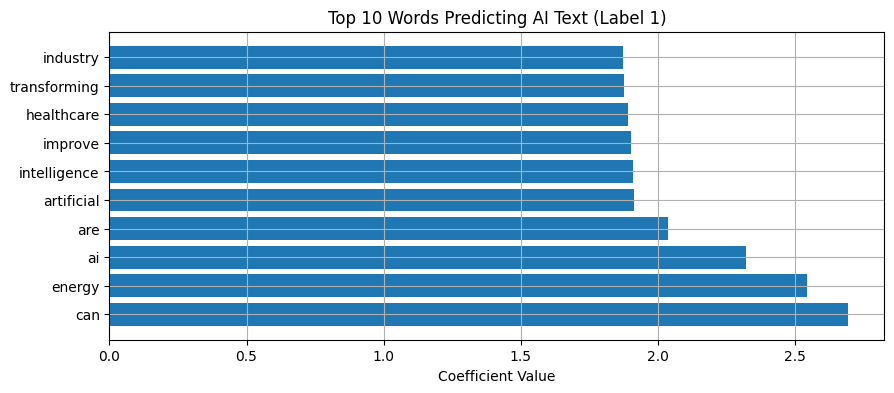

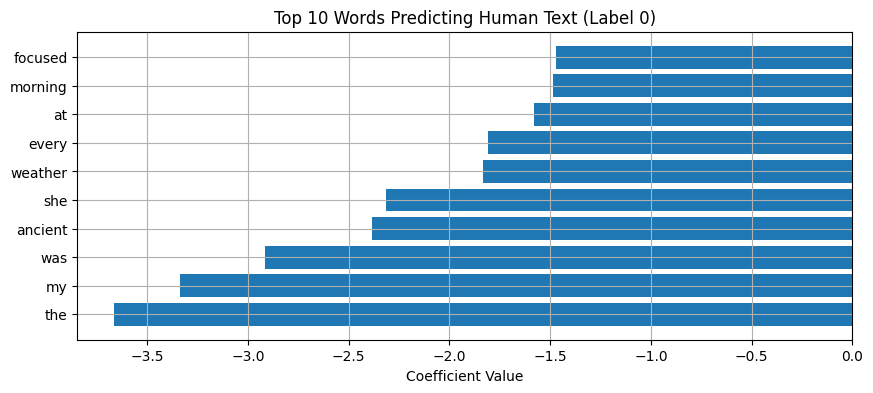

In [58]:
# Plot top positive (AI) words
plt.figure(figsize=(10, 4))
plt.barh(top_positive_words, coefficients[top_positive_idx])
plt.title("Top 10 Words Predicting AI Text (Label 1)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.show()

# Plot top negative (Human) words
plt.figure(figsize=(10, 4))
plt.barh(top_negative_words, coefficients[top_negative_idx])
plt.title("Top 10 Words Predicting Human Text (Label 0)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.show()

###  Compare Model Accuracies

This chart compares the performance of four different models used in this project: Logistic Regression, Decision Tree, and Naive Bayes. Each model was trained on the same dataset using TF-IDF vectorization and evaluated on test accuracy.

- **Logistic Regression** achieved perfect separation on the dataset.
- **Naive Bayes** followed closely.
- **Decision Tree** performed well but slightly behind others.

Visualizing this comparison helps reinforce which model is most appropriate for future deployment and gives quick insight into performance differences.


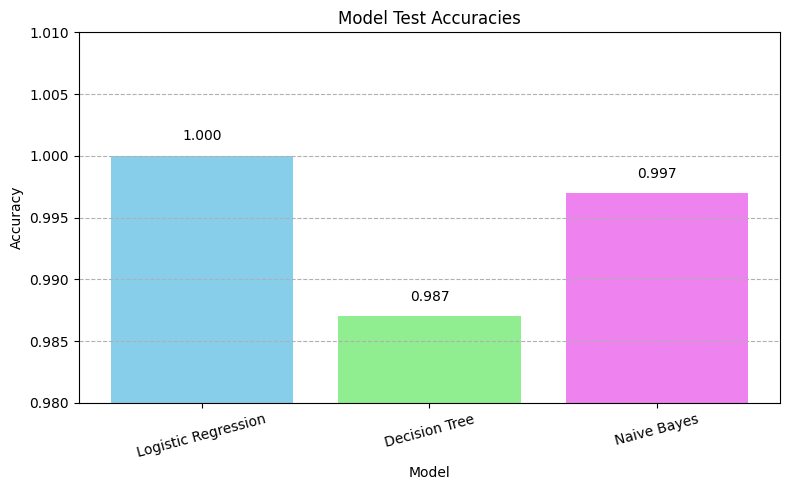

In [60]:
# Data to plot
models = ['Logistic Regression', 'Decision Tree',  'Naive Bayes']
accuracies = [1.00, 0.987, 0.997]
colors = ['skyblue',  'lightgreen', 'violet']

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0.98, 1.01)
plt.title('Model Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')

# Add accuracy values on top of each bar
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f"{acc:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

###  Saving All Models for Deployment
Storing trained models allows reuse without retraining.

In [62]:
# Create a folder for saving models
os.makedirs("model", exist_ok=True)

# Save each model separately
joblib.dump(model_lf, "model/logreg_model.joblib")
joblib.dump(model_dt, "model/rf_model.joblib")

joblib.dump(model_nb, "model/nb_model.joblib")

print(" All models saved successfully in the 'model/' folder.")

 All models saved successfully in the 'model/' folder.


###  Load and Use a Saved Model for New Prediction

In [63]:
# Load a model (example: Logistic Regression)
loaded_model = joblib.load("model/logreg_model.joblib")

# Predict on a new sample
sample = ["Exploring planetary systems reveals how life may evolve."]
prediction = loaded_model.predict(sample)[0]

print("Prediction:", "AI" if prediction == 1 else "Human")

Prediction: AI
